On this page you can view data about 2006101 malwares identified from January 1, 2020 to February 10, 2020.
Select what do you want to display:
    1. Number of malwares identified per day
    2. Number of malwares identified per hour
    3. Apply filter
    4. Exit
    
1
Generating chart...
done


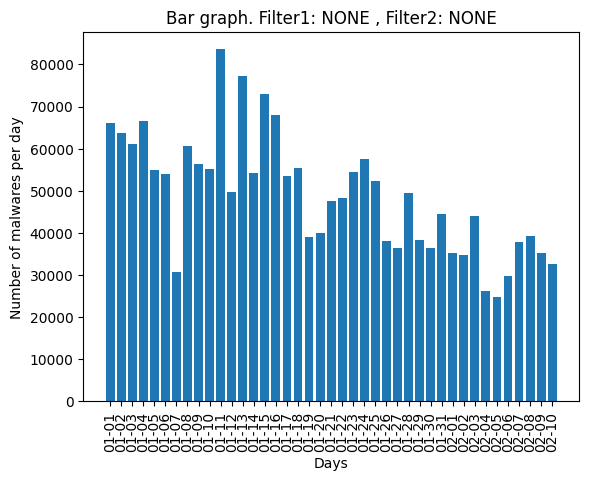

Select what do you want to display:
    1. Number of malwares identified per day
    2. Number of malwares identified per hour
    3. Apply filter
    4. Exit
    


In [ ]:

import json, time
from datetime import datetime
import matplotlib.pyplot as plt



def load_data(): 
    file = open("MalwareObjects.json")
    data = json.load(file)
    return data



def apply_location_filter(data, filters, filter_name): 
    print("Applying location filter...")
    data = apply_filters(data, filters)
    location_filter_applied = True
    print("done")
    return data, location_filter_applied, filter_name



def apply_location_inverse_filter(data, filters, filter_name): 
    print("Applying location filter...")
    data = apply_inverse_filters(data, filters)
    location_filter_applied = True
    print("done")
    return data, location_filter_applied, filter_name



def apply_type_filter(data, filters, filter_name): 
    print("Applying type filter...")
    data = apply_filters(data, filters)
    type_filter_applied = True
    print("done")
    return data, type_filter_applied, filter_name



def apply_type_inverse_filter(data, filters, filter_name): 
    print("Applying type filter...")
    data = apply_inverse_filters(data, filters)
    type_filter_applied = True
    print("done")
    return data, type_filter_applied, filter_name



def apply_filters(data, filters): 
    new_data = []
    for i in range(len(data)): 
        malware_name = data[i]["name"].lower()
        for filt in filters: 
            if malware_name.find(filt)>=0: 
                new_data.append(data[i])
    return new_data



def apply_inverse_filters(data, filters): 
    new_data = []
    for i in range(len(data)): 
        found = False
        malware_name = data[i]["name"].lower()
        for filt in filters: 
            if malware_name.find(filt)>=0: 
                found = True
                break
        if found == False: 
            new_data.append(data[i])
    return new_data



def main(): 

    data = load_data()
    location_filter_applied = False
    loc_filter = "NONE"
    type_filter_applied = False
    type_filter = "NONE"


    print("On this page you can view data about 2006101 malwares identified from January 1, 2020 to February 10, 2020.") 
    while True: 
        print("""Select what do you want to display:
    1. Number of malwares identified per day
    2. Number of malwares identified per hour
    3. Apply filter
    4. Exit
    """)
        option = input()
        if option == "1": 
            print("Generating chart...")            
            dates = []
            dictionary_dates = {}
            for i in range(len(data)): 
                date = data[i]["created"].lower()
                date = date.split("t")
                day_month_year = date[0]
                day_month_year = day_month_year.split("-")
                day_month = day_month_year[1] + "-" + day_month_year[2]
                if day_month not in dates: 
                    dates.append(day_month)
                    dictionary_dates[day_month] = 1
                else: 
                    dictionary_dates[day_month] += 1
            count = [0]*len(dates)
            for i in range(len(dates)): 
                count[i] = dictionary_dates[dates[i]]
            plt.bar(dates, count)
            plt.xlabel("Days")
            plt.ylabel("Number of malwares per day")
            plt.title("Bar graph. Filter1: "+ loc_filter +" , Filter2: " + type_filter)
            plt.xticks(rotation=90)
            print("done")
            plt.show()
            data = load_data()
            location_filter_applied = False
            loc_filter = "NONE"
            type_filter_applied = False
            type_filter = "NONE"
            

        elif option == "2": 
            print("Generating chart...")
            
            
            x = []
            y = []
            for i in range(len(data)): 
                date = data[i]["created"].lower()
                date = date.replace("+0000", ".0")
                specific_date = date.split(".")
                specific_date = specific_date[0]
                specific_date = specific_date.split("t")
                day_month_year = specific_date[0]
                specific_hour = specific_date[1]
                specific_hour = specific_hour.split(":")
                specific_second = int(specific_hour[0]) * 3600 + int(specific_hour[1]) * 60 + int(specific_hour[2])
                day_month_year = day_month_year.split("-")
                specific_day = (int(day_month_year[1]) - 1)*31 + int(day_month_year[2])
                #specific_hour = datetime.strptime(specific_hour, "%H:%M:%S").strftime("%H:%M:%S")
                #x.append(specific_hour)
                x.append(specific_second)
                y.append(specific_day)

            plt.scatter(x, y)
            plt.xlabel("Time_of_day(seconds)")
            plt.ylabel("Day")
            plt.xticks(rotation=90)
            plt.title("Scatter plot. Filter1: "+ loc_filter +" , Filter2: " + type_filter)
            print("done")
            plt.show()
            data = load_data()
            location_filter_applied = False
            loc_filter = "NONE"
            type_filter_applied = False
            type_filter = "NONE"
            
            
        elif option == "3": 
            print("""What filter do you want to apply:
    1. Filter by malware location
    2. Filter by malware type
    3. Go back
    """)
            filter_type = input()
            if filter_type == "1": 
                if location_filter_applied: 
                    print("Location filter has been already applied!\n")
                    continue
                print("""select where the malwares are located:
    1. Win32 (449393/2006101 instances with no previous filters applied)
    2. Win64 (80398/2006101 instances with no previous filters applied)
    3. Android (44924/2006101 instances with no previous filters applied)
    4. Linux (944/2006101 instances with no previous filters applied)
    5. JS (51520/2006101 instances with no previous filters applied)
    6. HTML (28243/2006101 instances with no previous filters applied)
    7. Other locations (1372244/2006101 instances with no previous filters applied)
    8. Go back
    """)    
                location_filter = input()
                if location_filter == "1": 
                    data, location_filter_applied, loc_filter = apply_location_filter(data, ["win32", "w32"], "Win32")
                elif location_filter == "2": 
                    data, location_filter_applied, loc_filter = apply_location_filter(data, ["win64", "w64"], "Win64")
                elif location_filter == "3": 
                    data, location_filter_applied, loc_filter = apply_location_filter(data, ["android"], "Android")
                elif location_filter == "4": 
                    data, location_filter_applied, loc_filter = apply_location_filter(data, ["linux"], "Linux")
                elif location_filter == "5": 
                    data, location_filter_applied, loc_filter = apply_location_filter(data, ["js"], "JS")
                elif location_filter == "6": 
                    data, location_filter_applied, loc_filter = apply_location_filter(data, ["html"], "HTML")
                elif location_filter == "7": 
                    data, location_filter_applied, loc_filter = apply_location_inverse_filter(data, ["win32", "w32","win64", "w64","android", "linux", "js","html"], "Others")
                elif location_filter == "8": 
                    continue
                else: 
                    print("Invalid input\n")
                
            elif filter_type == "2": 
                if type_filter_applied: 
                    print("Type filter has been already applied!\n")
                    continue
                print("""select the type of malware:
    1. Trojan (323120/2006101 instances with no previous filters applied)
    2. Virut (90993/2006101 instances with no previous filters applied)
    3. Unknown malware (66405/2006101 instances with no previous filters applied)
    4. Others (1525616/2006101 instances with no previous filters applied)
    5. Go back 
    """)    
                type_filter = input()
                if type_filter == "1": 
                    data, type_filter_applied, type_filter = apply_type_filter(data, ["troj"], "trojan")
                elif type_filter == "2": 
                    data, type_filter_applied, type_filter = apply_type_filter(data, ["virut"], "Virut")
                elif type_filter == "3": 
                    data, type_filter_applied, type_filter = apply_type_filter(data, ["unknown"], "Unknown")
                elif type_filter == "4": 
                    data, type_filter_applied, type_filter = apply_type_inverse_filter(data, ["troj", "virut","unknown"], "Others")
                elif type_filter == "5": 
                    continue
                else: 
                    print("Invalid input\n")
                    
            elif option == "3": 
                continue
            else: 
                print("Please, choose an option: 1, 2 or 3\n")
            
        elif option == "4": 
            exit()
        else: 
            print("Please, choose an option: 1, 2 or 3\n")


main()



